| Project name   |  Distance Measuring |
|:----------|:-------------|
| **Autor(S)**| , Ivan Sanchez<br> , Alex Machado<br> , Daniel Garcia |
| **Editor**|Dr. Adán Hirales Carbajal|
| **Last update** | 02/12/2022 |

### <span style="color:blue">Introduction</span>

Measuring distance to target objects or materials air that does not touch or damage the target have many applications in many economic and military sectors i.e. factory automation, robotics, material handling, etc. The most prominent kind of sensors are ultrasonic based. Ultrasonic sensors measure the distance to a wide range of objects regardless of shape, color or surface texture. However, they are very sensitive to variation in temperature and have difficulties in reading reflections when the material surface is soft, curved or thin.

Time of Flight (ToF) distance sensors use the time that it takes for photons to travel between two points to calculate the distance between the points. They facilitate long range distance measurements (60m), minimize weight, do not affect biological entities, among other advantages.

In this work, we create an photon based distance measurement architecture based on the VL53L0X light sensor and the STM32 F413ZHT6 microprocessor interconnected via I2C protocol. We explain the overall architecture of the solution and operational aspects of the sensor. 

The STM will use FreeRTOS to manage the sensor and to interpret the data collected.



### <span style="color:blue">Problem Statement </span>

Monitoring liquid flows is difficult, expensive, and in some cases dangerous. Hence, tools that minimize the risk of accidents or of life are sought. Monitoring the levels of reservoirs is important, but in some cases complex due to fumes, extreme heat or turbulent flows. 

Three classes of flows are distinguished in channel reservoir flows: laminar, transitional, and turbulent. Laminar flows is characterized by smooth particle flows. Transitional is a mixture of laminar and turbulent flows. In turbulent flows fluid particles undergo irregular fluctuation. It is characterized by chaotic changes in pressure and flow velocity.

In this work, our aim is to measure the level of a water reservoir subject the occurrence of different levels of turbulence. 

### <span style="color:blue">Hardware requirements</span>
|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|STM32 F413ZHT6 144 pins|1| Microprocessor <a href="https://www.st.com/resource/en/datasheet/stm32f413cg.pdf" title="Docs1">Documentation</a>|<img src="/img/STM32.jpg" alt="STM32" title="stm32">|
|Bread Board|1| A standard bread board to implement circuitry |<img src="/img/BREAD_BOARD.jpg" alt="bread board" title="bread board">|
|ADAFRUIT Wifi 802.11b Communication Module | 1| Data rate: 802.11n, up to 150Mbps (downlink) and up to 150Mbp <a href="https://ww1.microchip.com/downloads/en/DeviceDoc/atmel-42376-smartconnect-winc1500-mr210pa_datasheet.pdf" title="Docs1">Documentation</a> |<img src="/img/ADAFRUIT_WIFI.jpg" alt="adafruit wifi" title="wifi module">|
|VL53L0X |1| Light sensor <a href="https://www.mouser.com/datasheet/2/389/vl53l3cx-1799823.pdf" title="Docs1">Documentation</a>|<img src="/img/LIGHT_SENSOR.jpg" alt="light sensor" title="sensor">|
|Resistors| 1| | |
 

### <span style="color:blue">Hardware layout</span>

The following image corresponds to the hardware schematic of this project:
<!-- | | |
|:--:|:--:|
|<img class="large-image" width="40" height="40" src="img_shift_register/circuit/installed.png" alt="Installed hardware"/>|<img class="large-image" width="40" height="40" src="img_shift_register/circuit/stm32_connections.jpg" alt="Connection to board"/>|
|Installed hardware |Connection to board|
|<img class="large-image" width="40" height="40" src="img_shift_register/circuit/pa3_marked.png" alt="Installed hardware"/>|<img class="large-image" width="40" height="40" src="img_shift_register/circuit/pc0_marked.png" alt="Connection to board"/>|
|Read data to STM32. Pin PA3 connection |Clock signal. Pin PC0 connection|
|<img class="large-image" width="40" height="40" src="img_shift_register/circuit/pc3_marked.png" alt="Installed hardware"/>|<img class="large-image" width="40" height="40" src="img_shift_register/circuit/pf3_marked.png" alt="Connection to board"/>|
|PC3: Choose between parallel and serial mode. Pin PC3 connection|Send serial data from STM32 to IC|
 -->


# Hardware schematic
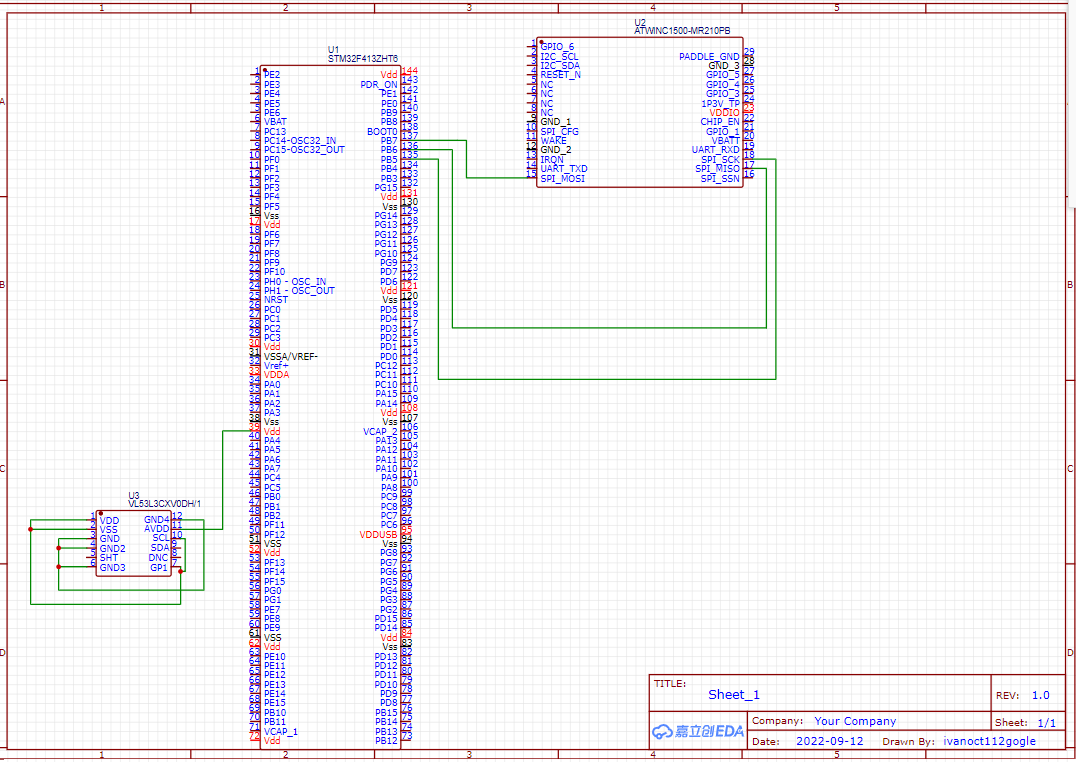

### <span style="color:blue">CubeMX parameters</span>

Activate I2C1 in connectivity and then in specifications (Paramater settings) make sure that I2C Speed Mode is "standard mode" and set pins pb6 and pb7 as scl and sda respectively and choose pd12 as gpioutput.
We also enable FREERTOS in CMSIS_V1 
in clock confugartion we have to make sure it is 16MHZ

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#999;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#444;background-color:#F7FDFA;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#fff;background-color:#26ADE4;}
.tg .tg-c3ow{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <caption>Project specification</caption>
  <tr>
    <th class="tg-fymr" colspan="2">Class</th>
    <th class="tg-fymr" colspan="2">Attribute</th>
    <th class="tg-fymr" colspan="3">Value</th>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>Project</b></td>
    <td class="tg-c3ow" colspan="2">Name</td>
    <td class="tg-c3ow" colspan="3">distanceMeasuring</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Clock</td>
    <td class="tg-c3ow" colspan="3">16Mhz</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Timebase source</td>
    <td class="tg-c3ow" colspan="3">TM1</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>STM32 Pins</b></td>
      <td class="tg-c3ow" colspan="2"><span style="color:red">PB6, PB7, and PD12</span></td>
    <td class="tg-c3ow" colspan="3"><span style="color:red">and<br>Set PB6 to I2C1_SCL, PB7 to I2C1_SDA, and PD12 to GPIO_Output</span></td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>FreeRTOS</b></td>
    <td class="tg-c3ow" colspan="2">CMSIS</td>
    <td class="tg-c3ow" colspan="3">CMSIS_v1</td>
  </tr>
 <tr>
    <td class="tg-fymr"><b>Task/interrupt</b></td>
    <td class="tg-fymr"><b>Type</b></td>
    <td class="tg-fymr"><b>Name</b></td>
    <td class="tg-fymr"><b>Entry function</b></td>
    <td class="tg-fymr"><b>$w_j$</b></td>
    <td class="tg-fymr"><b>$p_j$</b></td>
    <td class="tg-fymr"><b>Port</b></td>
  </tr>
  <tr>
      <td class="tg-fymr">1</td>
      <td class="tg-fymr">Persistent</td>
      <td class="tg-fymr">Tinst</td>
      <td class="tg-fymr"><span style="color:red"></span></td>
      <td class="tg-fymr">osPriorityNormal</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr"></td>
    </tr>
  <tr>
      <td class="tg-fymr">2</td>
      <td class="tg-fymr">Interrupt</td>
      <td class="tg-fymr">Tcomm</td>
      <td class="tg-fymr"><span style="color:red"></span></td>
      <td class="tg-fymr">osPriorityLo
      
     
   </tr>
    
</table>

<!--
This solution is by <a href = "mailto: ristobal.capiz@cetys.mx">Mtro. Christobal Capiz</a>. Academic Coordinator - Mechatronics Engineering at CETYS Universidad Mexicali. The following table summarizes the project settings. To configure TIM6 to operate at 1 Hz APB1 timer clocks was set to operate at 16Mhz, TIM6 settings include:
- Prescaler (PSC) to 1600-1
- Counter period (16 bit AutoReload Register, ARR) to 10000-1.

The solution uses **pointers to update the period memory location**.
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#999;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#444;background-color:#F7FDFA;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#fff;background-color:#26ADE4;}
.tg .tg-c3ow{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <caption>Table III. Solution 1 specification</caption>
  <tr>
    <th class="tg-fymr" colspan="2">Class</th>
    <th class="tg-fymr" colspan="2">Attribute</th>
    <th class="tg-fymr" colspan="3">Value</th>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>Project</b></td>
    <td class="tg-c3ow" colspan="2">Name</td>
    <td class="tg-c3ow" colspan="3">F767ZIV1_IntS1</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Clock</td>
    <td class="tg-c3ow" colspan="3">16Mhz</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Timebase source</td>
    <td class="tg-c3ow" colspan="3">TM1</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>STM32 Pins</b></td>
      <td class="tg-c3ow" colspan="2"><span style="color:red">PC13, PB0, PB7, and PB14</span></td>
    <td class="tg-c3ow" colspan="3"><span style="color:red">Set PC13 to GPIO_Input and<br>PB0, PB7, and PB14 to GPIO_Output</span></td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>FreeRTOS</b></td>
    <td class="tg-c3ow" colspan="2">API</td>
    <td class="tg-c3ow" colspan="3">CMSIS v1</td>
  </tr>
 <tr>
    <td class="tg-fymr"><b>Task/interrupt</b></td>
    <td class="tg-fymr"><b>Type</b></td>
    <td class="tg-fymr"><b>Name</b></td>
    <td class="tg-fymr"><b>Entry function</b></td>
    <td class="tg-fymr"><b>$w_j$</b></td>
    <td class="tg-fymr"><b>$p_j$</b></td>
    <td class="tg-fymr"><b>Port</b></td>
  </tr>
  <tr>
      <td class="tg-fymr">1</td>
      <td class="tg-fymr">Persistent</td>
      <td class="tg-fymr">buttonTask</td>
      <td class="tg-fymr"><span style="color:red">buttonTaskHook</span></td>
      <td class="tg-fymr">osPriorityNormal</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr">PC13</td>
    </tr>
  <tr>
      <td class="tg-fymr">2</td>
      <td class="tg-fymr">Interrupt</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr"><span style="color:red">HAL_TIM_PeriodElapsedCallBack</span></td>
      <td class="tg-fymr">0</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr">PB0 at 1 Hz,<br>PB7 at 2 Hz,<br>PB14 at 4 Hz.</td>
   </tr>
</table>

**Note**, NVIC TIM6 must be enabled in cubeMX and ```HAL_TIM_Base_Start_IT``` executed for ```HAL_TIM_PeriodElapsedCallBack``` to work.
-->

### <span style="color:blue">Software components (design) </span>

This section presents the static entity diagram, the control diagram and the communication (colaborative) diagram that illustrates the relationships between components. 

<img class="large-image" width="600" height="600" src="https://raw.githubusercontent.com/Ivanosss/RTOS/distanceMeasuring/F413ZHT6_DistanceMeasuring/img/StaticEntityDiagram_DistanceMeasuring.png" alt="static_entity_diagram"/>

<img class="large-image" width="600" height="600" src="https://raw.githubusercontent.com/Ivanosss/RTOS/distanceMeasuring/F413ZHT6_DistanceMeasuring/img/ControlDiagram_DistanceMeasuring.png">

<img class="large-image" width="600" height="600" src="https://raw.githubusercontent.com/Ivanosss/RTOS/distanceMeasuring/F413ZHT6_DistanceMeasuring/img/CommunicationDiagram_DistanceMeasuring.png"/>


### <span style="color:blue">Software components (in code implementation) </span>

The main functions used in this project belong to the VL53L0X API which is a set of C functions controlling the VL53L0X (init, ranging,…) to enable the development of end-user applications.
This API is structured in a way it can be compiled on any kind of platform through a well isolated platform layer (mainly for low level I2C access).

Main functions used in the project:

void setAddress(VL53L0X * lidar, uint8_t new_addr)
```
void setAddress(VL53L0X * lidar, uint8_t new_addr)
{
  writeReg(lidar,I2C_SLAVE_DEVICE_ADDRESS, new_addr & 0x7F);
  lidar->address = new_addr;
}
```

Initialize sensor using sequence based on VL53L0X_DataInit(), VL53L0X_StaticInit(), and VL53L0X_PerformRefCalibration(). This function does not perform reference SPAD calibration
(VL53L0X_PerformRefSpadManagement()), since the API user manual says that it is performed by ST on the bare modules; it seems like that should work well enough unless a cover glass is added.
If io_2v8 (optional) is true or not given, the sensor is configured for 2V8 mode.

init(VL53L0X * lidar,bool io_2v8)
```
bool init(VL53L0X * lidar,bool io_2v8)
{
  // VL53L0X_DataInit() begin

  // sensor uses 1V8 mode for I/O by default; switch to 2V8 mode if necessary
  if (io_2v8)
  {
    writeReg(lidar,VHV_CONFIG_PAD_SCL_SDA__EXTSUP_HV,
      readReg(lidar,(VHV_CONFIG_PAD_SCL_SDA__EXTSUP_HV) | 0x01)); // set bit 0
  }

  // "Set I2C standard mode"
  writeReg(lidar,0x88, 0x00);

  writeReg(lidar,0x80, 0x01);
  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x00, 0x00);
  lidar->stop_variable = readReg(lidar,0x91);
  //snprintf(msg,sizeof(msg),"Stop variable is: 0x%X , should be 0x%X\r\n",lidar->stop_variable,readReg(lidar,0x91));
  //HAL_UART_Transmit(&huart2, (uint8_t*)msg, strlen(msg), 0xFFFF);
  writeReg(lidar,0x00, 0x01);
  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x80, 0x00);

  // disable SIGNAL_RATE_MSRC (bit 1) and SIGNAL_RATE_PRE_RANGE (bit 4) limit checks
  writeReg(lidar,MSRC_CONFIG_CONTROL, readReg(lidar,MSRC_CONFIG_CONTROL) | 0x12);

  // set final range signal rate limit to 0.25 MCPS (million counts per second)
  setSignalRateLimit(lidar,0.25);

  writeReg(lidar,SYSTEM_SEQUENCE_CONFIG, 0xFF);

  // VL53L0X_DataInit() end

  // VL53L0X_StaticInit() begin

  uint8_t spad_count;
  bool spad_type_is_aperture;
  if (!getSpadInfo(lidar,&spad_count, &spad_type_is_aperture)) { return false; }

  // The SPAD map (RefGoodSpadMap) is read by VL53L0X_get_info_from_device() in
  // the API, but the same data seems to be more easily readable from
  // GLOBAL_CONFIG_SPAD_ENABLES_REF_0 through _6, so read it from there
  uint8_t ref_spad_map[6];
  readMulti(lidar,GLOBAL_CONFIG_SPAD_ENABLES_REF_0, ref_spad_map, 6);
  //snprintf(msg,sizeof(msg),"Spads: 0x%X, 0x%X, 0x%X, 0x%X, 0x%X, 0x%X\r\n",ref_spad_map[0],ref_spad_map[1],ref_spad_map[2],ref_spad_map[3],ref_spad_map[4],ref_spad_map[5]);
  //HAL_UART_Transmit(&huart2, (uint8_t*)msg, strlen(msg), 0xFFFF);
  // -- VL53L0X_set_reference_spads() begin (assume NVM values are valid)

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,DYNAMIC_SPAD_REF_EN_START_OFFSET, 0x00);
  writeReg(lidar,DYNAMIC_SPAD_NUM_REQUESTED_REF_SPAD, 0x2C);
  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,GLOBAL_CONFIG_REF_EN_START_SELECT, 0xB4);

  uint8_t first_spad_to_enable = spad_type_is_aperture ? 12 : 0; // 12 is the first aperture spad
  uint8_t spads_enabled = 0;

  for (uint8_t i = 0; i < 48; i++)
  {
    if (i < first_spad_to_enable || spads_enabled == spad_count)
    {
      // This bit is lower than the first one that should be enabled, or
      // (reference_spad_count) bits have already been enabled, so zero this bit
      ref_spad_map[i / 8] &= ~(1 << (i % 7));
    }
    else if ((ref_spad_map[i / 8] >> (i % 7)) & 0x1)
    {
      spads_enabled++;
    }
  }

  writeMulti(lidar,GLOBAL_CONFIG_SPAD_ENABLES_REF_0, ref_spad_map, 6);

  // -- VL53L0X_set_reference_spads() end

  // -- VL53L0X_load_tuning_settings() begin
  // DefaultTuningSettings from vl53l0x_tuning.h

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x00, 0x00);

  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x09, 0x00);
  writeReg(lidar,0x10, 0x00);
  writeReg(lidar,0x11, 0x00);

  writeReg(lidar,0x24, 0x01);
  writeReg(lidar,0x25, 0xFF);
  writeReg(lidar,0x75, 0x00);

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x4E, 0x2C);
  writeReg(lidar,0x48, 0x00);
  writeReg(lidar,0x30, 0x20);

  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x30, 0x09);
  writeReg(lidar,0x54, 0x00);
  writeReg(lidar,0x31, 0x04);
  writeReg(lidar,0x32, 0x03);
  writeReg(lidar,0x40, 0x83);
  writeReg(lidar,0x46, 0x25);
  writeReg(lidar,0x60, 0x00);
  writeReg(lidar,0x27, 0x00);
  writeReg(lidar,0x50, 0x06);
  writeReg(lidar,0x51, 0x00);
  writeReg(lidar,0x52, 0x96);
  writeReg(lidar,0x56, 0x08);
  writeReg(lidar,0x57, 0x30);
  writeReg(lidar,0x61, 0x00);
  writeReg(lidar,0x62, 0x00);
  writeReg(lidar,0x64, 0x00);
  writeReg(lidar,0x65, 0x00);
  writeReg(lidar,0x66, 0xA0);

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x22, 0x32);
  writeReg(lidar,0x47, 0x14);
  writeReg(lidar,0x49, 0xFF);
  writeReg(lidar,0x4A, 0x00);

  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x7A, 0x0A);
  writeReg(lidar,0x7B, 0x00);
  writeReg(lidar,0x78, 0x21);

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x23, 0x34);
  writeReg(lidar,0x42, 0x00);
  writeReg(lidar,0x44, 0xFF);
  writeReg(lidar,0x45, 0x26);
  writeReg(lidar,0x46, 0x05);
  writeReg(lidar,0x40, 0x40);
  writeReg(lidar,0x0E, 0x06);
  writeReg(lidar,0x20, 0x1A);
  writeReg(lidar,0x43, 0x40);

  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x34, 0x03);
  writeReg(lidar,0x35, 0x44);

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x31, 0x04);
  writeReg(lidar,0x4B, 0x09);
  writeReg(lidar,0x4C, 0x05);
  writeReg(lidar,0x4D, 0x04);

  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x44, 0x00);
  writeReg(lidar,0x45, 0x20);
  writeReg(lidar,0x47, 0x08);
  writeReg(lidar,0x48, 0x28);
  writeReg(lidar,0x67, 0x00);
  writeReg(lidar,0x70, 0x04);
  writeReg(lidar,0x71, 0x01);
  writeReg(lidar,0x72, 0xFE);
  writeReg(lidar,0x76, 0x00);
  writeReg(lidar,0x77, 0x00);

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x0D, 0x01);

  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x80, 0x01);
  writeReg(lidar,0x01, 0xF8);

  writeReg(lidar,0xFF, 0x01);
  writeReg(lidar,0x8E, 0x01);
  writeReg(lidar,0x00, 0x01);
  writeReg(lidar,0xFF, 0x00);
  writeReg(lidar,0x80, 0x00);

  // -- VL53L0X_load_tuning_settings() end

  // "Set interrupt config to new sample ready"
  // -- VL53L0X_SetGpioConfig() begin

  writeReg(lidar,SYSTEM_INTERRUPT_CONFIG_GPIO, 0x04);
  writeReg(lidar,GPIO_HV_MUX_ACTIVE_HIGH, readReg(lidar,GPIO_HV_MUX_ACTIVE_HIGH) & ~0x10); // active low
  writeReg(lidar,SYSTEM_INTERRUPT_CLEAR, 0x01);

  // -- VL53L0X_SetGpioConfig() end

  lidar->measurement_timing_budget_us = getMeasurementTimingBudget(lidar);

  // "Disable MSRC and TCC by default"
  // MSRC = Minimum Signal Rate Check
  // TCC = Target CentreCheck
  // -- VL53L0X_SetSequenceStepEnable() begin

  writeReg(lidar,SYSTEM_SEQUENCE_CONFIG, 0xE8);

  // -- VL53L0X_SetSequenceStepEnable() end

  // "Recalculate timing budget"
  setMeasurementTimingBudget(lidar,lidar->measurement_timing_budget_us);

  // VL53L0X_StaticInit() end

  // VL53L0X_PerformRefCalibration() begin (VL53L0X_perform_ref_calibration())

  // -- VL53L0X_perform_vhv_calibration() begin

  writeReg(lidar,SYSTEM_SEQUENCE_CONFIG, 0x01);
  if (!performSingleRefCalibration(lidar,0x40)) { return false; }

  // -- VL53L0X_perform_vhv_calibration() end

  // -- VL53L0X_perform_phase_calibration() begin

  writeReg(lidar,SYSTEM_SEQUENCE_CONFIG, 0x02);
  if (!performSingleRefCalibration(lidar,0x00)) { return false; }

  // -- VL53L0X_perform_phase_calibration() end

  // "restore the previous Sequence Config"
  writeReg(lidar,SYSTEM_SEQUENCE_CONFIG, 0xE8);

  // VL53L0X_PerformRefCalibration() end

  return true;
}
```

writeReg(lidar,VHV_CONFIG_PAD_SCL_SDA__EXTSUP_HV,

readReg(lidar,(VHV_CONFIG_PAD_SCL_SDA__EXTSUP_HV) | 0x01));

VL53L0X_DataInit() end

VL53L0X_StaticInit() begin  

VL53L0X_SetSequenceStepEnable() end

### <span style="color:blue"> Analysis of Results </span>

<h4>Results</h4>

The VL53L0X is a new generation Time-of-Flight
(ToF) laser-ranging module housed in the
smallest package on the market today, providing
accurate distance measurement whatever the
target reflectances unlike conventional
technologies. It can measure absolute distances
up to 2m, setting a new benchmark in ranging
performance levels, opening the door to various
new applications. 


"This laser ranging sensor operates in a range of 2.5 to 3.6 volts and uses a time of flight principle for measuring distance. The sensor consists of a vertical-cavity surface-emitting laser (VCSEL). This cavity releases a laser beam that strikes the object in a detection range and reflects back. The device measures time taken by the laser beam. Using this time, we calculate the distance between the object and the sensor" (MicrocontrollersLab, 2022, p.1).

"The light sensor takes the “indirect” approach, where it emits light with a periodic or “modulated” pattern, then calculates the shift in the return measurement" (Oliver, 2021, p.3).

Using this approach, as a result the sensor was able to store 12 distance measurements in a buffer.  

<h4>Challenges</h4>

Due to the  VL53L0X being a state-of-the-art sensor the documentation available was scarce and limited to Japanese sources. Furthermore, to use its API the sensor needed an expensive expansion board. As a workaround the API functions had to be refactored to spare the expansion board usage. 

### <span style="color:blue"> Conclusion </span>
The project was a success according to the learning outcomes of the Operating Systems course, organizing the different methods and signals through the FreeRTOS (scheduling a task for execution) and recognizing how these hardware components interact with each other to solve a problem. As well as diving into uncharted territory by using the  VL53L0X sensor, brand-new in the industry, to easily get long distance measurements. 

### <span style="color:blue">References </span>
Atmel. (2021). WINC1500-MR210PA DATASHEET. Retrieved from https://ww1.microchip.com/downloads/en/DeviceDoc/atmel-42376-smartconnect-winc1500-mr210pa_datasheet.pdf \\

MicrocontrollersLab. (2022). VL53L0X LIDAR Distance Sensor Interfacing with Arduino. Retrieved from https://microcontrollerslab.com/vl53l0x-module-interfacing-arduino/ \\

MicrocontrollersLab. (2022). LIDAR and Time-of-flight part 2 operation. Retrieved from https://www.microcontrollertips.com/lidar-and-time-of-flight-part-2-operation/ \\

Mouser. (2022). VL53L3CX Datasheet. Retrieved from https://www.mouser.com/datasheet/2/389/vl53l3cx-1799823.pdf \\

Mouser. (2022). VL53L3CXV0DH Datasheet. Retrieved from https://www.mouser.com/datasheet/2/389/vl53l3cx-1799823.pdf \\

Oliver, A. (2021). Understanding Indirect TOF Depth Sensing. Retrieved from https://devblogs.microsoft.com/azure-depth-platform/understanding-indirect-tof-depth-sensing/ \\

ST. (2022). STM Home. Retrieved from https://www.st.com/content/st_com/en.html \\

ST. (2022). STM32F413xG STM32F413xH Datasheet - Production Data. Retrieved from https://www.st.com/resource/en/datasheet/stm32f413cg.pdf \\

ST. (2022). VL53L0X: Time-of-flight Sensor. Retrieved from https://www.st.com/en/imaging-and-photonics-solutions/vl53l0x.html
   \\

<!--
#### Creating the message queue

This code creates our <i>message</i> data type, which stores 8 bits of data, one per input read. These messages are then put in the queue created by the function ```StartQueue```, from where they can later be retrieved and sent serially to the shift register that will use them.

```
#define MSGQUEUE_OBJECTS 16

typedef struct {
  uint8_t flags;
} MSGQUEUE_OBJ_t;

osMessageQueueId_t mid_MsgQueue;

void StartQueue(void)
{
  mid_MsgQueue = osMessageQueueNew(MSGQUEUE_OBJECTS, sizeof(MSGQUEUE_OBJ_t), NULL);
  osDelay(osWaitForever);
  while (1)
    ;
}
```
-->

<!--
#### Reading from C4014BE Parallel input / serial output shift register

The following code signals the PISO shift register to sample all 8 inputs and send them serially to pin PA3, where they are read and stored in our previously declared <i>message queue</i>. If this queue is full, the function will keep trying to store the same message until successful, yielding control as requested by the RTOS.

This function has <b>normal priority</b>, which means that it is at the same priority level as our <i>write</i> function.

```
void StartRead(void *argument)
{
  /* VARIABLE DECLARATION */
  uint8_t tmp_reading = 0;

  /* Infinite loop */
  for(;;)
  {

    MSGQUEUE_OBJ_t msg;
    /* P/S Control HIGH to read from parallel inputs */
    HAL_GPIO_WritePin(GPIOC, GPIO_PIN_3, GPIO_PIN_SET);
    osDelay(10);

    /* Read from inputs */
    HAL_GPIO_WritePin(GPIOC, GPIO_PIN_0, GPIO_PIN_SET);
    osDelay(10);

    /* Reset pins to start serial transmission */
    HAL_GPIO_WritePin(GPIOC, GPIO_PIN_0|GPIO_PIN_3, GPIO_PIN_RESET);

    /* Read all 8 inputs */
    for(int i = 0; i < 8; i++) {
      /* Shift msg to prepare for reading */
      msg.flags <<= 1;

      /* HAL_GPIO_WritePin(GPIOB, LD3_Pin, GPIO_PIN_SET); */
      /* Set the message content */
      tmp_reading = HAL_GPIO_ReadPin(GPIOA, GPIO_PIN_3);
      msg.flags |= tmp_reading;


      /* Shift to next input */
      HAL_GPIO_WritePin(GPIOC, GPIO_PIN_0, GPIO_PIN_SET);
      osDelay(50);
      HAL_GPIO_WritePin(GPIOC, GPIO_PIN_0, GPIO_PIN_RESET);
      osDelay(50);
    }

    /* Send message to queue. Wait forever, retrying, if queue is full */
    /* HAL_GPIO_WritePin(GPIOB, LD3_Pin, GPIO_PIN_SET); */
    osMessageQueuePut(mid_MsgQueue, &msg, 0U, osWaitForever);
    /* HAL_GPIO_WritePin(GPIOB, LD3_Pin, GPIO_PIN_RESET); */

    osDelay(1000);
  }
}
```
-->

<!--
#### Writing to SN54HC595 Serial input / parallel output shift register

The function ```StartWrite``` remains idle while the <i>message queue</i> is empty. Once it receives a message, it is able to fetch it and examine it. If all is Ok, it serially shifts all 8 bits from the read message to the SIPO shift register. Once this is done, it signals the register to send all at once the stored bits to their respective output.

This function has <b>normal priority</b>, which means that it is at the same priority level as our <i>read</i> function.

```
void StartWrite(void *argument)
{
  /* VARIABLE DECLARATION */
  osStatus_t status;
  MSGQUEUE_OBJ_t msg;

  /* Infinite loop */
  for(;;)
  {
    /* Wait until message is available */
    status = osMessageQueueGet(mid_MsgQueue, &msg, NULL, osWaitForever);

    /* Validate message */
    if (status == osOK) {

      /* Load data into shift register */
      for(int i = 0; i < 8; i++) {
        /* Send bit from microcontroller*/
        if (msg.flags & 1)
          HAL_GPIO_WritePin(GPIOF, GPIO_PIN_3, GPIO_PIN_SET);
        else
          HAL_GPIO_WritePin(GPIOF, GPIO_PIN_3, GPIO_PIN_RESET);

        osDelay(20);

        /* Store received bit */
        HAL_GPIO_WritePin(GPIOF, GPIO_PIN_10, GPIO_PIN_SET);
        osDelay(20);
        HAL_GPIO_WritePin(GPIOF, GPIO_PIN_10, GPIO_PIN_RESET);

        /* Shift to next bit */
        msg.flags >>= 1;
      }
      /* Write stored data to shift register output */
        HAL_GPIO_WritePin(GPIOF, GPIO_PIN_5, GPIO_PIN_SET);
        osDelay(1);
        HAL_GPIO_WritePin(GPIOF, GPIO_PIN_5, GPIO_PIN_RESET);
    }
  }
}
```
-->

<!--
#### Setting up the pins

The function "MX_GPIO_Init" enables and sets all needed pins to an initially deasserted state, so that they can be used in the rest of the program.

```
C
static void MX_GPIO_Init(void)
{
  GPIO_InitTypeDef GPIO_InitStruct = {0};

  /* GPIO Ports Clock Enable */
  __HAL_RCC_GPIOC_CLK_ENABLE();
  __HAL_RCC_GPIOF_CLK_ENABLE();
  __HAL_RCC_GPIOH_CLK_ENABLE();
  __HAL_RCC_GPIOA_CLK_ENABLE();
  __HAL_RCC_GPIOB_CLK_ENABLE();
  __HAL_RCC_GPIOD_CLK_ENABLE();
  __HAL_RCC_GPIOG_CLK_ENABLE();

  /*Configure GPIO pin Output Level */
  HAL_GPIO_WritePin(GPIOF, GPIO_PIN_3|GPIO_PIN_5, GPIO_PIN_RESET);

  /*Configure GPIO pin Output Level */
  HAL_GPIO_WritePin(GPIOC, GPIO_PIN_0|GPIO_PIN_3, GPIO_PIN_RESET);

  /*Configure GPIO pins : PF3 PF5 PF10 */
  GPIO_InitStruct.Pin = GPIO_PIN_3|GPIO_PIN_5|GPIO_PIN_10;
  GPIO_InitStruct.Mode = GPIO_MODE_OUTPUT_PP;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  GPIO_InitStruct.Speed = GPIO_SPEED_FREQ_LOW;
  HAL_GPIO_Init(GPIOF, &GPIO_InitStruct);

  /*Configure GPIO pins : PC0 PC3 */
  GPIO_InitStruct.Pin = GPIO_PIN_0|GPIO_PIN_3;
  GPIO_InitStruct.Mode = GPIO_MODE_OUTPUT_PP;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  GPIO_InitStruct.Speed = GPIO_SPEED_FREQ_LOW;
  HAL_GPIO_Init(GPIOC, &GPIO_InitStruct);

  /*Configure GPIO pin : PA3 */
  GPIO_InitStruct.Pin = GPIO_PIN_3;
  GPIO_InitStruct.Mode = GPIO_MODE_INPUT;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  HAL_GPIO_Init(GPIOA, &GPIO_InitStruct);

}
```
-->